In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
import os

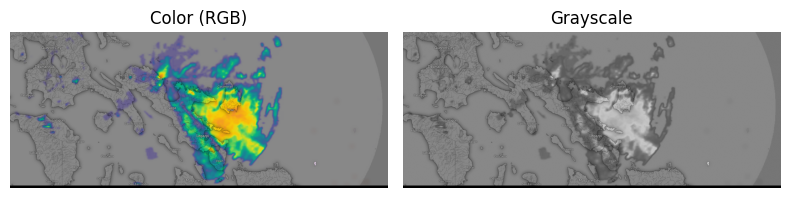

In [2]:
INPUT_PATH = 'data/images/philippines_13.269_123.832/'
files = sorted([os.path.join(INPUT_PATH, f) for f in os.listdir(INPUT_PATH) if f.endswith('.png')])
image_path = files[0]

color_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)
gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if color_bgr is None or gray is None:
    raise FileNotFoundError(f"Failed to load {image_path}")

# Convert BGR (OpenCV) to RGB (Matplotlib)
source_img = cv2.cvtColor(color_bgr, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(source_img)
axes[0].set_title("Color (RGB)")
axes[0].axis('off')
axes[1].imshow(gray, cmap='gray')
axes[1].set_title("Grayscale")
axes[1].axis('off')
plt.tight_layout()
plt.show()

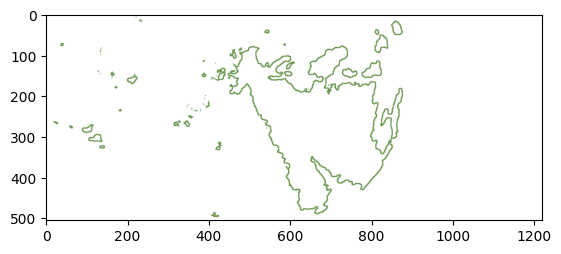

In [3]:
from utils.preprocessing import extract_contour_by_dbz
import json

with open('data/legend/color_dbz.json') as f:
    list_color = json.load(f)

sorted_color = sorted({tuple(color[1]): color[0] for color in list_color}.items(), key=lambda item: item[1])
sorted_color[:3]

contours_img, contours, colors  = extract_contour_by_dbz(color_bgr, thresholds=[20], sorted_color=sorted_color)
contours = contours[0]

plt.imshow(contours_img)
plt.show()

Number of contours with area > 100: 13


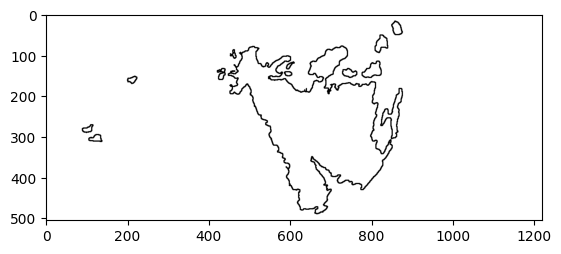

In [4]:
CONTOUR_THRESHOLD = 100

blank_img = np.ones(shape=source_img.shape, dtype=np.uint8) * 255
contours = sorted([polygon for polygon in contours if cv2.contourArea(polygon) > CONTOUR_THRESHOLD], key=lambda x: cv2.contourArea(x), reverse=True)
cv2.drawContours(blank_img, contours, -1, (0, 0, 0), 2)

print(f"Number of contours with area > {CONTOUR_THRESHOLD}: {len(contours)}")
plt.imshow(blank_img)
plt.show()

## Compute edge distance

In [5]:
# # Example on contours[0]
# contour = contours[0]

# edges_dist = []
# for i in range(len(contour)):
#     p1 = contour[i][0]
#     p2 = contour[(i + 1) % len(contour)][0]
#     dist = np.linalg.norm(p1 - p2)
#     edges_dist.append(dist)

# plt.hist(edges_dist, bins=10)
# plt.show()

## Analyzing contours map using `Persistence Homology`

In [6]:
import sys
if 'utils.persistence_homology' in sys.modules:
    print("Reloading 'utils.persistence_homology' module")
    del sys.modules['utils.persistence_homology']

/Users/trantrunghcmut/Documents/hcmut/semester 251/thunderstorm nowcasting/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/trantrunghcmut/Documents/hcmut/semester 251/thunderstorm nowcasting/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/trantrunghcmut/Documents/hcmut/semester 251/thunderstorm nowcasting/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


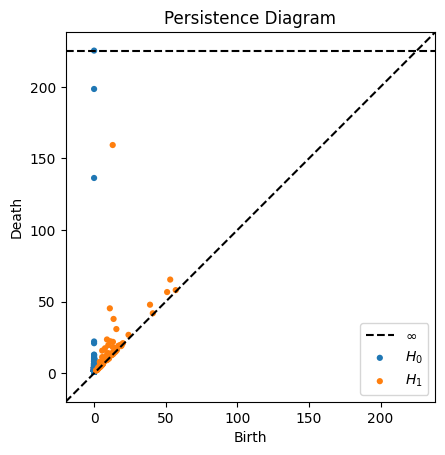

In [7]:
import utils
from utils.persistence_homology import PersistenceDiagram

data_cloud = [point for contour in contours for point in contour]
data_cloud = np.array(data_cloud).squeeze()
data_cloud.shape

res_pc = PersistenceDiagram.compute(data_cloud, maxdim=1)
PersistenceDiagram.plot_persistence_diagram(res_pc['dgms'])

In [8]:
# def persistence_homology_compute(idx: list[int] | int):
#     if isinstance(idx, int):
#         idx = [idx]
#     contours_to_process = [contours[i] for i in idx]
#     data_cloud = np.concatenate([contour.squeeze() for contour in contours_to_process])
#     res_pc = PersistenceDiagram.compute(data_cloud, maxdim=1)
#     PersistenceDiagram.plot_persistence_diagram(res_pc['dgms'])

#     return res_pc['dgms']x

# persistence_homology_compute([0, 1, 2])

/Users/trantrunghcmut/Documents/hcmut/semester 251/thunderstorm nowcasting/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/trantrunghcmut/Documents/hcmut/semester 251/thunderstorm nowcasting/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/trantrunghcmut/Documents/hcmut/semester 251/thunderstorm nowcasting/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


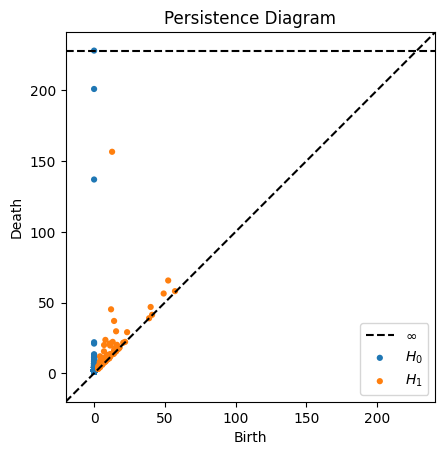

/Users/trantrunghcmut/Documents/hcmut/semester 251/thunderstorm nowcasting/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/trantrunghcmut/Documents/hcmut/semester 251/thunderstorm nowcasting/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/trantrunghcmut/Documents/hcmut/semester 251/thunderstorm nowcasting/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


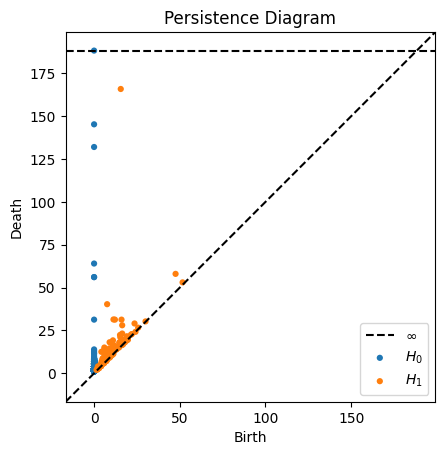

/Users/trantrunghcmut/Documents/hcmut/semester 251/thunderstorm nowcasting/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/trantrunghcmut/Documents/hcmut/semester 251/thunderstorm nowcasting/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/trantrunghcmut/Documents/hcmut/semester 251/thunderstorm nowcasting/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


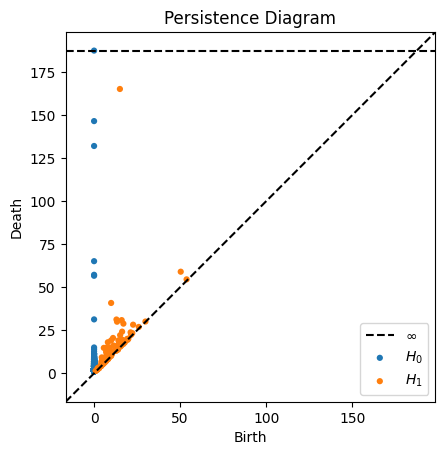

Done


In [9]:
from typing import Union, Optional
from utils.persistence_homology import PersistenceDiagram

def compute_persistence_homology(image_path: str, threshold: int = 20, idx: Optional[Union[list[int], int]] = None):
    source_img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if source_img is None:
        raise FileNotFoundError(f"Failed to load {image_path}")
    _, contours, _  = extract_contour_by_dbz(source_img, thresholds=[threshold], sorted_color=sorted_color)
    contours = contours[0]
    
    # Remove small contours
    contours = sorted([polygon for polygon in contours if cv2.contourArea(polygon) > CONTOUR_THRESHOLD], key=lambda x: cv2.contourArea(x), reverse=True)

    # Process specified contours
    if idx is not None:
        if isinstance(idx, int):
            idx = [idx]
        contours = [contours[i] for i in idx]
    data_cloud = np.concatenate([contour.squeeze() for contour in contours])
    res_pc = PersistenceDiagram.compute(data_cloud, maxdim=1)

    PersistenceDiagram.plot_persistence_diagram(res_pc['dgms'], title=f'Persistence Diagram for {os.path.basename(image_path)} at threshold {threshold}')

    return res_pc['dgms']

compute_persistence_homology(image_path=files[1], threshold=20)
compute_persistence_homology(image_path=files[2], threshold=20)
compute_persistence_homology(image_path=files[3], threshold=20)

print("Done")